### Currently, there are no precise theoretical methods to predict the mechanical properties of steel. All the methods available are backed by statistics and extensive physical testing of the materials. Since testing each material with different composition is a highly tedious task (imagine the number of possibilities!), let's apply our knowledge of machine learning and statistics to solve this problem.

___


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.2)

### Read dataset

In [7]:
df = pd.read_csv('MatNavi Mechanical properties of low-alloy steels.csv')
df

,Alloy code,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
0,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0,0.0000,27,342,490,30,71
1,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0,0.0000,100,338,454,27,72
2,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0,0.0000,200,337,465,23,69
3,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0,0.0000,300,346,495,21,70
4,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0,0.0000,400,316,489,26,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,CCB,0.22,0.22,1.24,0.021,0.008,0.030,0.05,0.017,0.01,0.005,0.005,0.0116,0.0,0.0017,350,268,632,28,65
911,CCB,0.22,0.22,1.24,0.021,0.008,0.030,0.05,0.017,0.01,0.005,0.005,0.0116,0.0,0.0017,400,244,575,28,68
912,CCB,0.22,0.22,1.24,0.021,0.008,0.030,0.05,0.017,0.01,0.005,0.005,0.0116,0.0,0.0017,450,224,500,29,72
913,CCB,0.22,0.22,1.24,0.021,0.008,0.030,0.05,0.017,0.01,0.005,0.005,0.0116,0.0,0.0017,500,209,428,30,78


### columns meaning

1. **Alloy code:** The alloy code is a string unique to each alloy.
2. **C:** carbon
3. **Si:** Silicon
4. **Mn:** manganese
5. **P:** Phosphorus
6. **S:** Sulfur
7. **Ni:** nickel
8. **Cr:** Chromium
9. **Mo:** Molybdenum
10. **Cu:** cobalt
11. **V:** Vanadium
12. **Al:** Aluminum
13. **N:** nitrogen
14. **Nb + Ta:** Niobium + Tantalum
15. **Temperature (°C):** The temperature in Celsius for each test is mentioned in a column
16. **0.2% Proof Stress (MPa):** Materials that show non-linear behavior or possess inelasticity such as concrete need 0.2% offset to determine their yield point.
17. **Tensile Strength (MPa):** A measure of the amount of stress a material is subjected to when it reaches the breaking point, at which point it breaks or loses its cohesion
18. **Elongation (%):** is a measure of the ductility of materials.
19. **Reduction in Area (%):** Reduction in the area is a ductility measurement sometimes used for tensile testing and to determine the suitability of a material for a given application.

### data analysis

In [8]:
df.corr()

,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
C,1.000000,-0.406268,0.031015,0.057410,0.012504,0.285788,0.018243,0.255056,0.370774,0.385099,-0.263321,0.035579,-0.273288,0.131773,-0.025522,0.198420,0.123722,-0.148794,-0.277629
Si,-0.406268,1.000000,0.223586,0.138152,-0.075110,-0.079105,0.117414,-0.027114,-0.104919,0.199058,0.390031,-0.122928,0.371245,-0.155321,0.037010,0.269033,0.066060,-0.124037,0.161944
Mn,0.031015,0.223586,1.000000,0.243866,-0.046163,0.454195,-0.474269,-0.405436,0.104023,0.007679,0.694037,-0.236880,0.736526,0.193360,-0.022865,0.399340,0.115703,-0.123131,0.103369
P,0.057410,0.138152,0.243866,1.000000,0.179914,-0.143954,-0.138566,-0.386247,-0.022641,-0.081315,0.253681,-0.255824,0.200261,0.283206,-0.029672,-0.042454,0.014310,0.127121,0.037407
S,0.012504,-0.075110,-0.046163,0.179914,1.000000,0.066504,0.006354,-0.054794,0.086668,0.048468,0.142494,-0.171404,0.059971,-0.023504,-0.003932,0.021205,0.049277,-0.042973,-0.127908
Ni,0.285788,-0.079105,0.454195,-0.143954,0.066504,1.000000,0.125985,0.332420,0.578134,0.341024,0.163561,0.132059,0.101914,-0.102744,0.035333,0.474990,0.141140,-0.291701,-0.019360
Cr,0.018243,0.117414,-0.474269,-0.138566,0.006354,0.125985,1.000000,0.795223,0.199199,0.631938,-0.395500,0.454140,-0.407968,-0.131404,0.092325,0.254899,0.122122,-0.303170,-0.053949
Mo,0.255056,-0.027114,-0.405436,-0.386247,-0.054794,0.332420,0.795223,1.000000,0.296401,0.722976,-0.484443,0.348385,-0.542066,-0.169583,0.086194,0.361247,0.172995,-0.411885,-0.173894
Cu,0.370774,-0.104919,0.104023,-0.022641,0.086668,0.578134,0.199199,0.296401,1.000000,0.294993,-0.262760,0.201425,-0.201816,-0.185688,0.024749,0.200388,0.066212,-0.178647,-0.179090
V,0.385099,0.199058,0.007679,-0.081315,0.048468,0.341024,0.631938,0.722976,0.294993,1.000000,-0.122061,0.232178,-0.062567,-0.086649,0.066731,0.636588,0.300307,-0.501546,-0.210469


In [9]:
df.drop('Alloy code', axis = 1, inplace=True)
df

,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
0,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0,0.0000,27,342,490,30,71
1,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0,0.0000,100,338,454,27,72
2,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0,0.0000,200,337,465,23,69
3,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0,0.0000,300,346,495,21,70
4,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0,0.0000,400,316,489,26,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,0.22,0.22,1.24,0.021,0.008,0.030,0.05,0.017,0.01,0.005,0.005,0.0116,0.0,0.0017,350,268,632,28,65
911,0.22,0.22,1.24,0.021,0.008,0.030,0.05,0.017,0.01,0.005,0.005,0.0116,0.0,0.0017,400,244,575,28,68
912,0.22,0.22,1.24,0.021,0.008,0.030,0.05,0.017,0.01,0.005,0.005,0.0116,0.0,0.0017,450,224,500,29,72
913,0.22,0.22,1.24,0.021,0.008,0.030,0.05,0.017,0.01,0.005,0.005,0.0116,0.0,0.0017,500,209,428,30,78


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0    C                        915 non-null    float64
 1    Si                       915 non-null    float64
 2    Mn                       915 non-null    float64
 3    P                        915 non-null    float64
 4    S                        915 non-null    float64
 5    Ni                       915 non-null    float64
 6    Cr                       915 non-null    float64
 7    Mo                       915 non-null    float64
 8    Cu                       915 non-null    float64
 9   V                         915 non-null    float64
 10   Al                       915 non-null    float64
 11   N                        915 non-null    float64
 12  Ceq                       915 non-null    float64
 13  Nb + Ta                   915 non-null    float64
 14   Temperatu

In [11]:
df.describe()

,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
count,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000
mean,0.174929,0.310918,0.812962,0.014543,0.010602,0.143016,0.427861,0.442870,0.079148,0.060190,0.012435,0.007652,0.093989,0.000041,351.601093,328.218579,496.248087,26.789071,70.206557
std,0.059674,0.086871,0.342775,0.005244,0.004024,0.172746,0.457568,0.394383,0.058481,0.096403,0.013067,0.002321,0.172533,0.000261,189.714773,131.653232,239.710650,8.806595,12.389289
min,0.090000,0.180000,0.420000,0.006000,0.003000,0.000000,0.000000,0.005000,0.000000,0.000000,0.002000,0.002500,0.000000,0.000000,27.000000,27.000000,162.000000,10.000000,18.000000
25%,0.130000,0.240000,0.500000,0.010000,0.008000,0.023000,0.040000,0.050000,0.040000,0.000000,0.004000,0.006200,0.000000,0.000000,200.000000,220.000000,413.000000,20.000000,62.000000
50%,0.160000,0.300000,0.680000,0.014000,0.010000,0.050000,0.110000,0.500000,0.070000,0.000000,0.006000,0.007600,0.000000,0.000000,400.000000,290.000000,479.000000,26.000000,71.000000
75%,0.200000,0.370000,1.210000,0.018000,0.012000,0.210000,1.000000,0.560000,0.110000,0.070000,0.016000,0.009000,0.000000,0.000000,500.000000,432.500000,575.000000,31.000000,80.000000
max,0.340000,0.520000,1.480000,0.030000,0.022000,0.600000,1.310000,1.350000,0.250000,0.300000,0.050000,0.015000,0.437000,0.001700,650.000000,690.000000,6661.000000,78.000000,94.000000


In [12]:
columns = df.columns
columns

Index([' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo', ' Cu', 'V', ' Al',
       ' N', 'Ceq', 'Nb + Ta', ' Temperature (°C)', ' 0.2% Proof Stress (MPa)',
       ' Tensile Strength (MPa)', ' Elongation (%)', ' Reduction in Area (%)'],
      dtype='object')

In [13]:
df.corr()[" Tensile Strength (MPa)"]

 C                          0.123722
 Si                         0.066060
 Mn                         0.115703
 P                          0.014310
 S                          0.049277
 Ni                         0.141140
 Cr                         0.122122
 Mo                         0.172995
 Cu                         0.066212
V                           0.300307
 Al                         0.077277
 N                          0.028585
Ceq                         0.065333
Nb + Ta                     0.051117
 Temperature (°C)          -0.328002
 0.2% Proof Stress (MPa)    0.480379
 Tensile Strength (MPa)     1.000000
 Elongation (%)            -0.459274
 Reduction in Area (%)     -0.437164
Name:  Tensile Strength (MPa), dtype: float64

In [14]:
for column in columns:
    print(f"-----------\"{column}\" column:-----------")
    print(df[column].value_counts())
    print("===============================\n")

-----------" C" column:-----------
0.120    115
0.140     95
0.150     85
0.160     79
0.170     70
0.200     63
0.290     58
0.130     48
0.100     40
0.180     40
0.280     38
0.300     30
0.090     20
0.220     20
0.230     20
0.210     18
0.143     10
0.123     10
0.190     10
0.148     10
0.340      9
0.240      9
0.110      9
0.260      9
Name:  C, dtype: int64

-----------" Si" column:-----------
0.22    74
0.28    68
0.25    64
0.30    57
0.33    51
0.37    50
0.26    49
0.23    39
0.20    38
0.21    38
0.39    38
0.31    37
0.52    30
0.32    28
0.24    27
0.49    20
0.34    20
0.36    20
0.47    20
0.35    20
0.29    19
0.50    10
0.48    10
0.18    10
0.44    10
0.38    10
0.41    10
0.42    10
0.43    10
0.27    10
0.19     9
0.40     9
Name:  Si, dtype: int64

-----------" Mn" column:-----------
0.48    56
0.45    47
0.49    39
1.23    31
0.62    29
0.44    29
0.66    29
0.63    28
0.70    28
1.24    21
1.37    21
1.14    20
0.72    20
1.27    20
0.79    20
1.32    20
0.75

### data visualization

<AxesSubplot:>

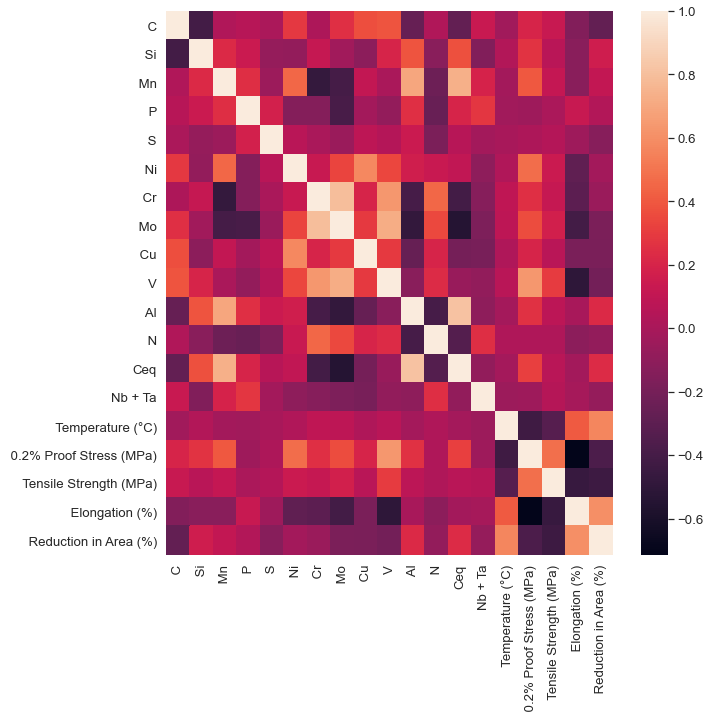

In [10]:
sns.heatmap(df.corr())

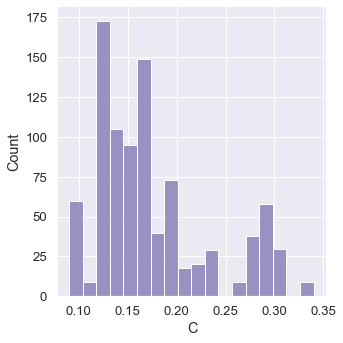

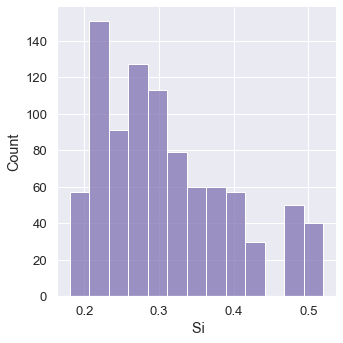

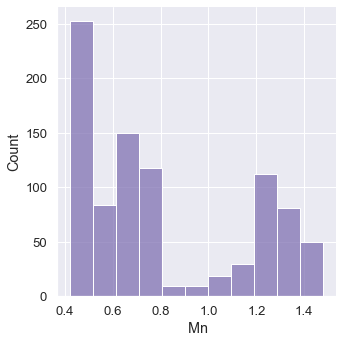

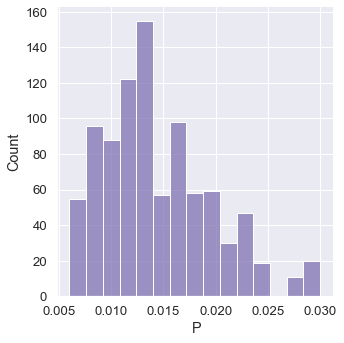

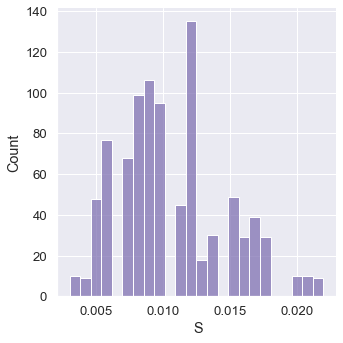

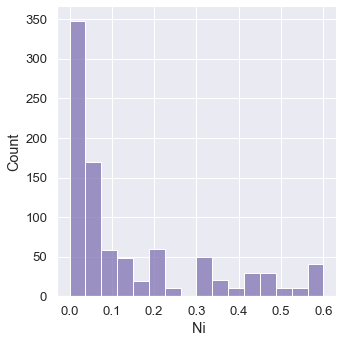

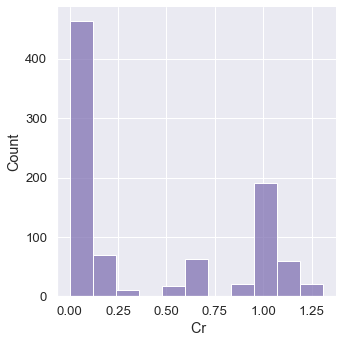

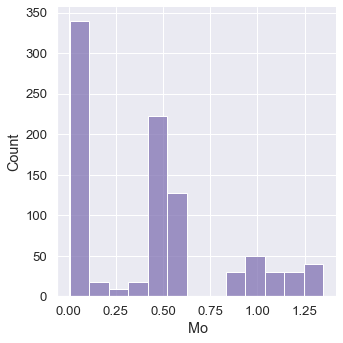

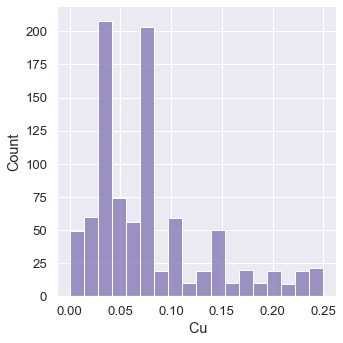

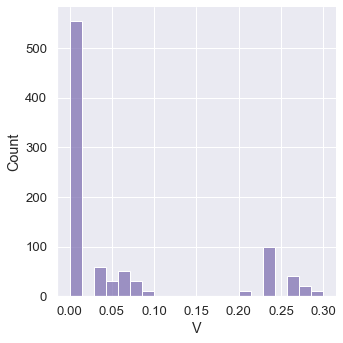

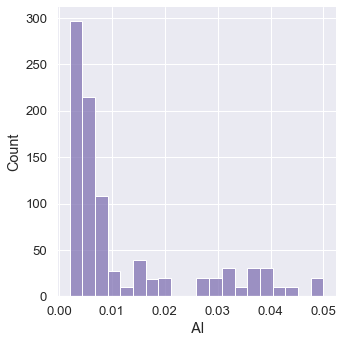

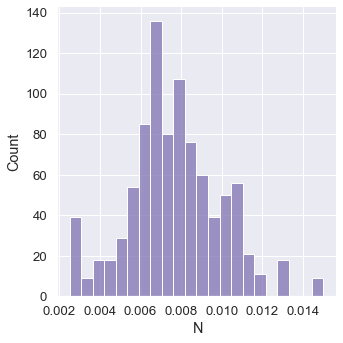

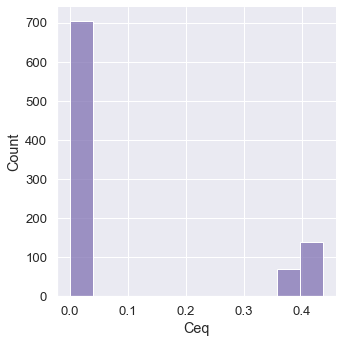

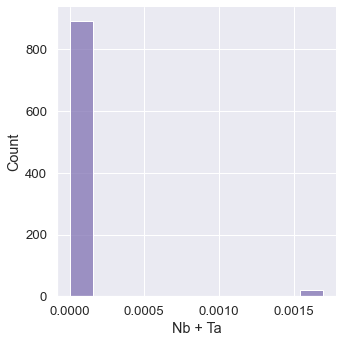

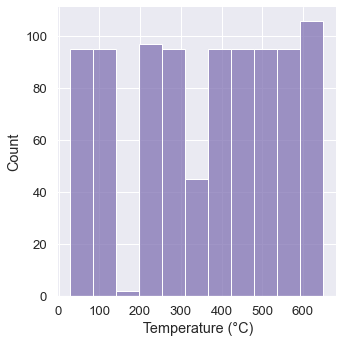

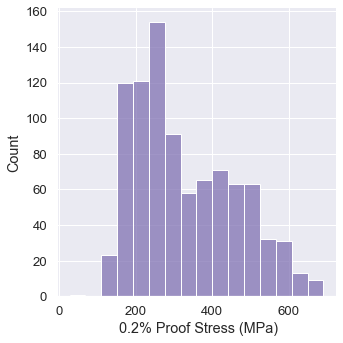

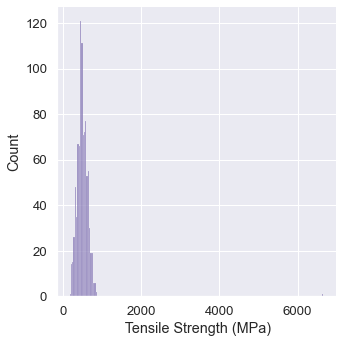

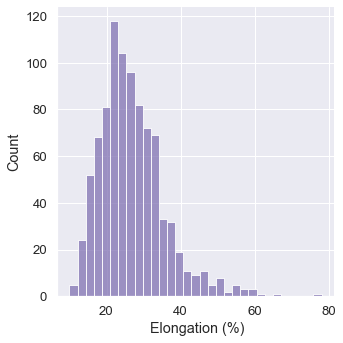

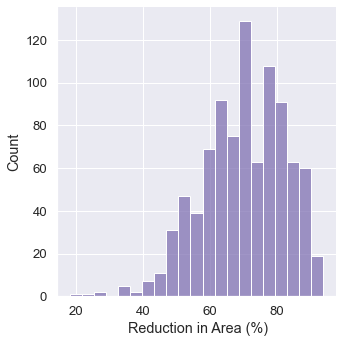

In [11]:
for column in columns:
    sns.displot(df[column], color='m')

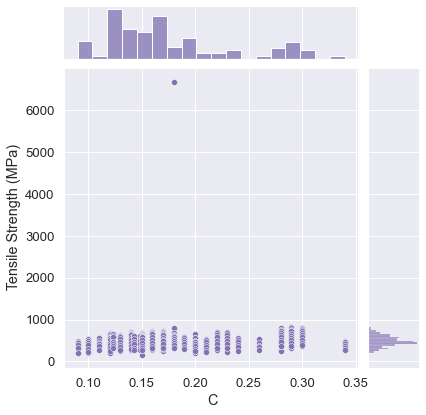

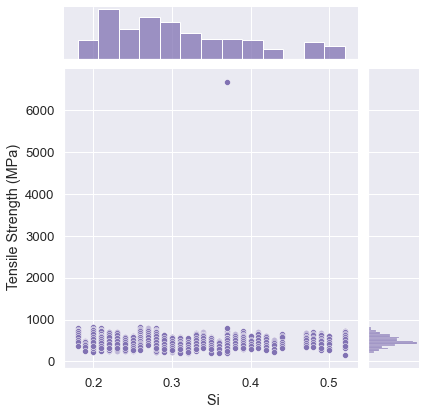

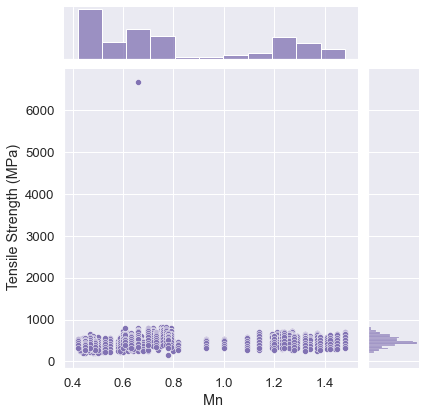

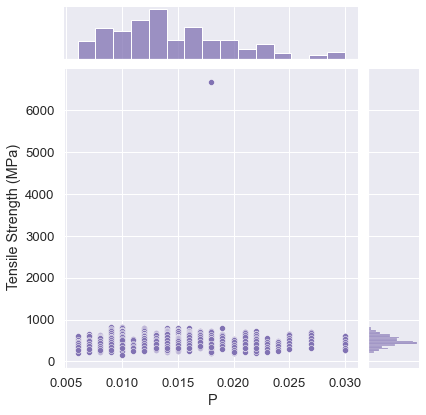

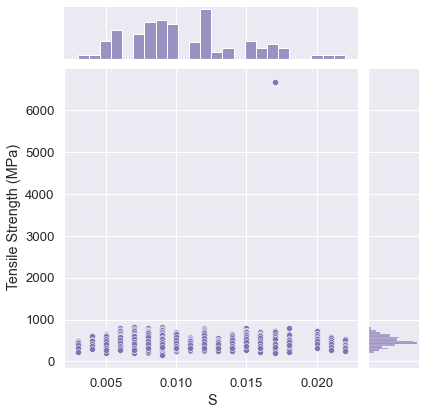

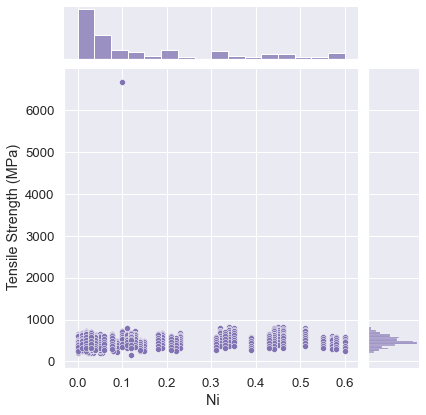

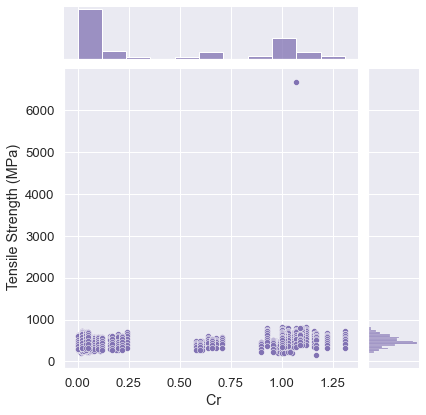

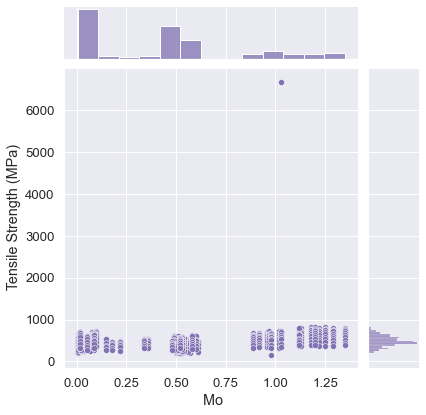

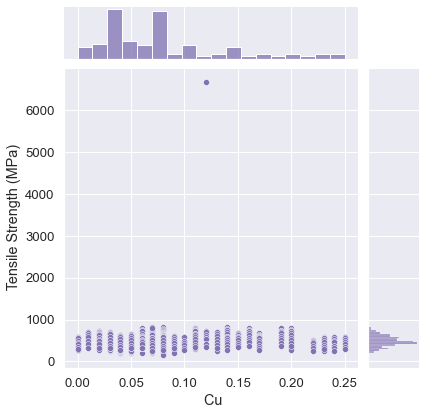

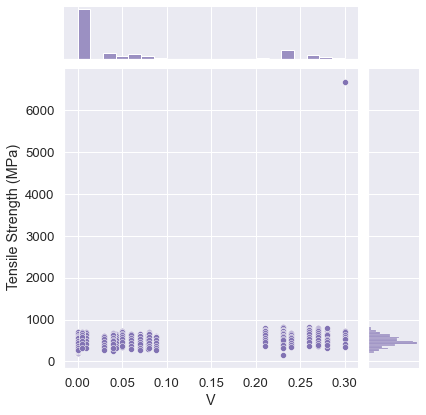

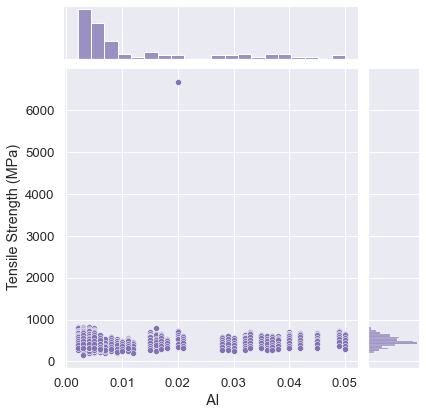

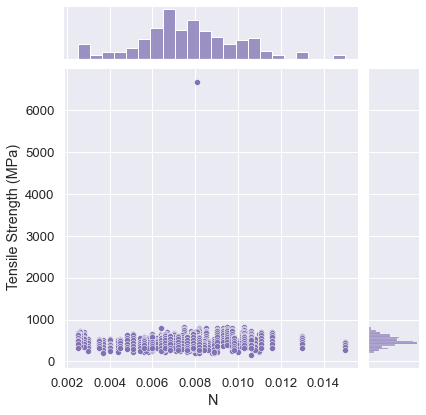

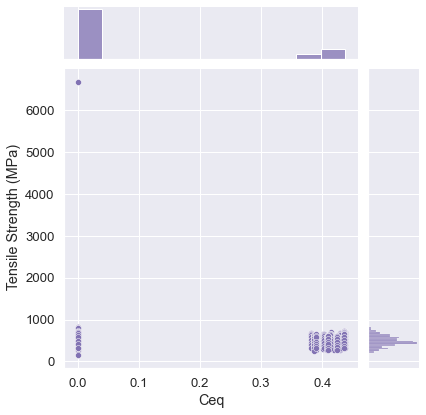

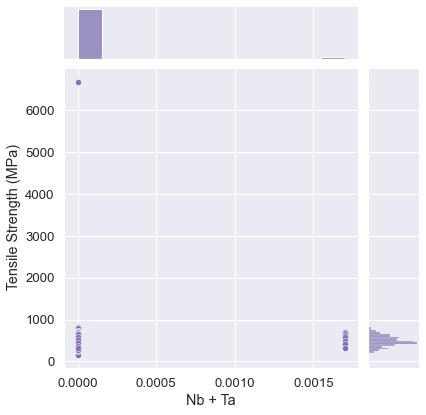

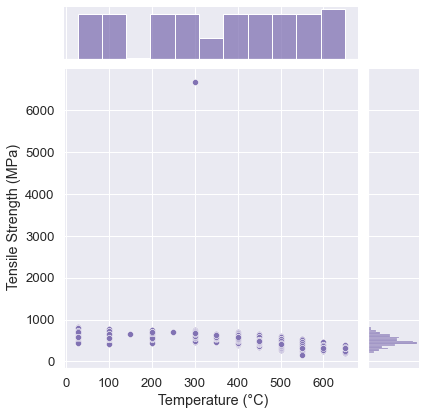

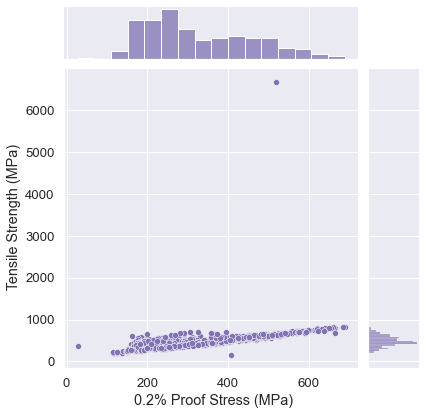

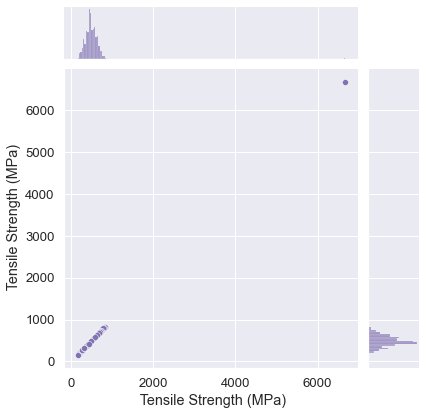

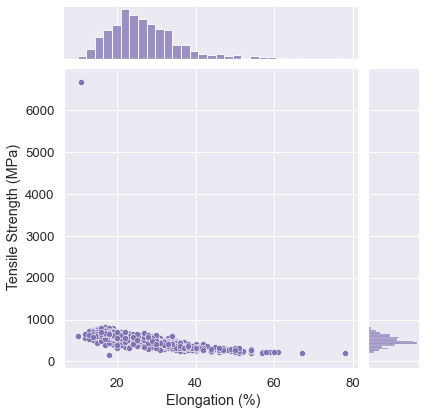

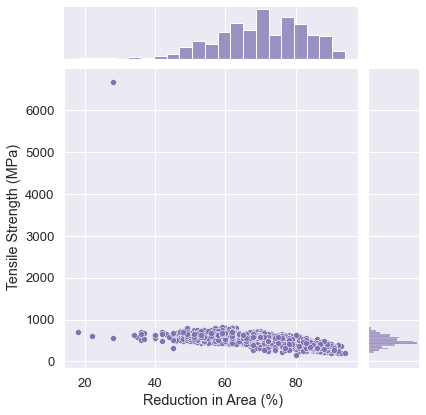

In [34]:
for column in columns:
    sns.jointplot(x=column , y=' Tensile Strength (MPa)', data=df, color='m')

### Data preprocessing

In [15]:
df.isna().sum()

 C                          0
 Si                         0
 Mn                         0
 P                          0
 S                          0
 Ni                         0
 Cr                         0
 Mo                         0
 Cu                         0
V                           0
 Al                         0
 N                          0
Ceq                         0
Nb + Ta                     0
 Temperature (°C)           0
 0.2% Proof Stress (MPa)    0
 Tensile Strength (MPa)     0
 Elongation (%)             0
 Reduction in Area (%)      0
dtype: int64

**no missing values detected**

In [16]:
x = df.drop(columns=[' 0.2% Proof Stress (MPa)', ' Tensile Strength (MPa)', ' Elongation (%)', ' Reduction in Area (%)', 'Ceq'])
x

,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Nb + Ta,Temperature (°C)
0,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0000,27
1,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0000,100
2,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0000,200
3,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0000,300
4,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0000,400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,0.22,0.22,1.24,0.021,0.008,0.030,0.05,0.017,0.01,0.005,0.005,0.0116,0.0017,350
911,0.22,0.22,1.24,0.021,0.008,0.030,0.05,0.017,0.01,0.005,0.005,0.0116,0.0017,400
912,0.22,0.22,1.24,0.021,0.008,0.030,0.05,0.017,0.01,0.005,0.005,0.0116,0.0017,450
913,0.22,0.22,1.24,0.021,0.008,0.030,0.05,0.017,0.01,0.005,0.005,0.0116,0.0017,500


In [21]:
y = df[" Tensile Strength (MPa)"]
y

0      490
1      454
2      465
3      495
4      489
      ... 
910    632
911    575
912    500
913    428
914    328
Name:  Tensile Strength (MPa), Length: 915, dtype: int64

**splitting data as training and testing**

In [22]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = True)

In [23]:
df.shape

(915, 19)

In [24]:
x_train.shape

(732, 14)

In [25]:
x_test.shape

(183, 14)

In [26]:
y_train.shape

(732,)

In [27]:
y_test.shape

(183,)

**Scaling**

In [28]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(x_train)
x_train = scale.transform(x_train)
x_test =scale.transform(x_test)

In [29]:
x_train

array([[-0.25707552,  2.41807099, -0.07138621, ...,  1.28797247,
        -0.14948702,  1.56518041],
       [-1.25519758, -0.12523874, -0.95060171, ...,  0.55316918,
        -0.14948702,  1.30079549],
       [-0.87258413,  1.49323109,  1.10090111, ..., -0.70031879,
        -0.14948702, -0.02112912],
       ...,
       [ 0.74104655, -1.05007864,  1.24743703, ...,  1.72020971,
         6.68954408, -0.54989897],
       [-0.58978287, -1.05007864, -1.03852326, ..., -0.70031879,
        -0.14948702,  1.30079549],
       [-0.92249023,  1.3776261 , -0.97990889, ...,  0.16415567,
        -0.14948702,  1.03641057]])

In [30]:
x_test

array([[-0.58978287,  0.91520615, -0.54030114, ..., -0.70031879,
        -0.14948702, -0.81428389],
       [-0.4234292 ,  2.41807099, -0.1006934 , ...,  1.28797247,
        -0.14948702, -1.72905572],
       [ 0.57469287, -1.16568362, -0.56960833, ..., -1.99703049,
        -0.14948702,  0.2432558 ],
       ...,
       [-0.92249023, -0.35644871, -1.09713762, ...,  1.02863014,
        -0.14948702,  1.56518041],
       [ 2.07187597, -0.35644871, -0.27653649, ...,  0.72606407,
        -0.14948702,  1.03641057],
       [ 0.40833919, -0.35644871, -0.62822269, ..., -0.44097646,
        -0.14948702, -0.81428389]])

### MACHINE LEARNING MODEL 

In [31]:
import xgboost

In [32]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [33]:
model = XGBRegressor()
model.fit(x_train, y_train)
print("By Using XGB Model:-")
print(f'Training Score: {model.score(x_train, y_train)}')
print(f'Test Score: {model.score(x_test, y_test)}') 
y_pred = model.predict(x_test)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')

By Using XGB Model:-
Training Score: 0.999935605413546
Test Score: 0.980895302855502
RMSE: 18.173358956913297


In [34]:
y_pred[:100]

array([600.3963 , 706.4511 , 434.33353, 434.756  , 403.93176, 401.52307,
       641.4152 , 482.32922, 621.03143, 476.25064, 642.2409 , 632.6679 ,
       365.22095, 584.9673 , 491.67575, 425.13647, 355.30304, 472.83353,
       297.77557, 578.69617, 427.66672, 446.32733, 398.21063, 383.87875,
       667.8671 , 540.3554 , 471.28134, 476.7397 , 468.89218, 537.0497 ,
       481.97845, 573.87463, 339.17377, 269.46292, 619.85144, 463.27383,
       373.67053, 488.53363, 279.62915, 512.184  , 722.02277, 505.18918,
       367.22113, 325.25195, 315.1067 , 456.94446, 428.60477, 687.22107,
       492.9975 , 452.5705 , 666.8184 , 515.72174, 573.9836 , 455.77136,
       258.2404 , 404.6709 , 344.4546 , 408.73917, 385.7237 , 599.12286,
       709.15924, 523.61145, 284.29987, 462.21423, 485.54553, 274.61148,
       763.78705, 550.74927, 685.8477 , 265.91788, 456.84103, 399.23456,
       270.40665, 596.43726, 407.49353, 580.18   , 269.1121 , 304.40558,
       435.41718, 741.8385 , 580.2986 , 441.03763, 

In [35]:
np.array(y_test[:100])

array([616, 680, 443, 425, 405, 417, 627, 505, 618, 471, 655, 625, 371,
       607, 482, 423, 356, 482, 300, 578, 432, 431, 413, 367, 682, 537,
       477, 458, 475, 532, 454, 574, 349, 270, 593, 459, 343, 493, 286,
       495, 710, 546, 354, 330, 306, 468, 412, 678, 465, 492, 680, 517,
       548, 441, 253, 412, 349, 425, 415, 565, 696, 534, 283, 471, 487,
       258, 761, 576, 736, 269, 462, 398, 276, 572, 505, 560, 268, 314,
       435, 731, 608, 450, 736, 308, 482, 618, 790, 605, 566, 211, 622,
       634, 790, 405, 430, 810, 386, 524, 506, 558], dtype=int64)

In [36]:
x.columns

Index([' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo', ' Cu', 'V', ' Al',
       ' N', 'Nb + Ta', ' Temperature (°C)'],
      dtype='object')

In [37]:
new_data = [0.2 , 0.16 , 0.12, 0.06 , 0.09 , 0.069 , 0.05 , 0.006 , 0.0098 , 0.068 , 0.08 , 0.09 , 0.008 , 350]

In [38]:
new_data = scale.transform([new_data]) # Apply Scaling on new data

In [39]:
model.predict(new_data)[0] # predect Tensile Strength (MPa) for the new data

602.23755

**Saving Model, Scaling, and Columns Names For Deployment  :)**

In [40]:
import joblib

In [41]:
joblib.dump(model, 'model.h5')

['model.h5']

In [42]:
joblib.dump(scale, 'scaler.h5')

['scaling.h5']

In [43]:
joblib.dump(x.columns, 'columns.h5')

['columns.h5']